In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LassoCV

In [4]:
data = pd.read_csv('comments.csv')
data

,video_id,comment 1,comment 2,comment 3,comment 4,comment 5,comment 6,comment 7,comment 8,comment 9,comment 10,comment 11,comment 12,comment 13,comment 14,comment 15
0,6jZag81Tmhw,I just want to say and remind everyone watchin...,I really want to thank Malvika for uploading t...,I'm from Manglaore and it's so cute how your m...,You know it’s a good day once mals has uploaded ❤,I won’t mind seeing 1 hour vlogs ❤ you are so ...,"Trust me, I was waiting for ur vlog! I always ...",Love from Malaysia. I’ve been watching your vi...,Soo proud of you!!! You are such an inspiratio...,Feels like my elder sister is back. When you p...,"I love it how independent and strong you are, ...",you are so so strong and powerful and you radi...,The pregnancy glow showing up ❤,U r an inspiration to smile no matter what lif...,We love you malzzz so so so much you're truly ...,"Mals, so so proud of you.❤ I hope you're doing..."
1,m-s_nvzc_HI,This feels too personal to me. Going through a...,"Mals, it’s so empowering to see such a strong ...",25:17 I literally cried while Mals was closing...,I hope this kid makes you proud and forgets ev...,The fact that Akhil left everything for you to...,"You are an absolute inspiration, words fall sh...",These videos are so raw real vulnerable and so...,I have nothing to express how proud I am of yo...,"That line...""Everything that begins,must end"" ...",It’s been an year that I’m watching all her vl...,"Your brothers,mum are such a blessing.Your tea...",I am a 17 year old and you have been my inspir...,She is definitely inspiring and so courageous....,I'm so proud of you for pushing through and ma...,"Malvika is a true , living example of how to t..."
2,P8mbRQoxrwk,This is what being financially independent giv...,"Honestly Mals, I am so addicted to your vlogs ...","Mals, it's really sad to see you going through...",Imagine your baby watching your vlogs when he/...,I dont know why but i feel more connected to M...,I just want to appreciate how this woman prese...,Malvika I can't tell you how much strength you...,I usually watch vlogs on 1.75x speed but your ...,I am also pregnant..also going through mental ...,Sending lots of love & strength your way! ❤❤❤ ...,Oh my gosh! Congrats on finding a new apartmen...,"For real Mals, your vlogs are like a much awai...",I feel people should talk more about why their...,You’re everything that you need and you’re a s...,Whenever I'm sad Or confused about my decision...
3,1FnDfz8Gn8Q,Gosh.. Ive never seen anyone so soo strong. Be...,You’re like the first ray of sunshine after a ...,I have been through these court procedures 4 y...,I barely comment on any YouTube videos.\nBut h...,Been there - the family court etc. Didn't have...,Im so happy to see you become this strong woma...,I'm in love with this Mals! Oh Boy! If I ever ...,I feel like just coming and giving you a big m...,You go gurl\nU r inspiring ❤,I just want to say you've built such a pure re...,Ahhh ! So grateful for this video! So encourag...,Only hugs and kisses and warm vibes your way t...,One day ur baby gonna watch these videos.nd re...,So proud of the woman you are … such an inspir...,Mals you’re so so so strong! I’m so proud of y...
4,ztAMazHQxCY,I love how she's packed all fruits and nuts an...,"I love how she's encouraging mums , including ...",seen malz from 7 yrs Always seen malz like a s...,The amount of emotions we see in her eyes when...,I got goosebumps when you talked about ‘self l...,You should have more of your mom on your chann...,"After a hectic week at work, I always prefer w...",The best part of this video is your mum’s and ...,I remember seeing your vlogs from lockdown whe...,I am also going through the exact situation-pr...,Even in such difficult situations you are moti...,Your mom is hilarious ! All that lack of self ...,Talking about self love with your mom. Such a ...,Never been a fan but anyway I do not really ha...,No don't generalize. My father is a government...
5,j6Fc17sSS9c,Co parentin

In [5]:
data.set_index('video_id',inplace=True)
data

,comment 1,comment 2,comment 3,comment 4,comment 5,comment 6,comment 7,comment 8,comment 9,comment 10,comment 11,comment 12,comment 13,comment 14,comment 15
video_id,,,,,,,,,,,,,,,
6jZag81Tmhw,I just want to say and remind everyone watchin...,I really want to thank Malvika for uploading t...,I'm from Manglaore and it's so cute how your m...,You know it’s a good day once mals has uploaded ❤,I won’t mind seeing 1 hour vlogs ❤ you are so ...,"Trust me, I was waiting for ur vlog! I always ...",Love from Malaysia. I’ve been watching your vi...,Soo proud of you!!! You are such an inspiratio...,Feels like my elder sister is back. When you p...,"I love it how independent and strong you are, ...",you are so so strong and powerful and you radi...,The pregnancy glow showing up ❤,U r an inspiration to smile no matter what lif...,We love you malzzz so so so much you're truly ...,"Mals, so so proud of you.❤ I hope you're doing..."
m-s_nvzc_HI,This feels too personal to me. Going through a...,"Mals, it’s so empowering to see such a strong ...",25:17 I literally cried while Mals was closing...,I hope this kid makes you proud and forgets ev...,The fact that Akhil left everything for you to...,"You are an absolute inspiration, words fall sh...",These videos are so raw real vulnerable and so...,I have nothing to express how proud I am of yo...,"That line...""Everything that begins,must end"" ...",It’s been an year that I’m watching all her vl...,"Your brothers,mum are such a blessing.Your tea...",I am a 17 year old and you have been my inspir...,She is definitely inspiring and so courageous....,I'm so proud of you for pushing through and ma...,"Malvika is a true , living example of how to t..."
P8mbRQoxrwk,This is what being financially independent giv...,"Honestly Mals, I am so addicted to your vlogs ...","Mals, it's really sad to see you going through...",Imagine your baby watching your vlogs when he/...,I dont know why but i feel more connected to M...,I just want to appreciate how this woman prese...,Malvika I can't tell you how much strength you...,I usually watch vlogs on 1.75x speed but your ...,I am also pregnant..also going through mental ...,Sending lots of love & strength your way! ❤❤❤ ...,Oh my gosh! Congrats on finding a new apartmen...,"For real Mals, your vlogs are like a much awai...",I feel people should talk more about why their...,You’re everything that you need and you’re a s...,Whenever I'm sad Or confused about my decision...
1FnDfz8Gn8Q,Gosh.. Ive never seen anyone so soo strong. Be...,You’re like the first ray of sunshine after a ...,I have been through these court procedures 4 y...,I barely comment on any YouTube videos.\nBut h...,Been there - the family court etc. Didn't have...,Im so happy to see you become this strong woma...,I'm in love with this Mals! Oh Boy! If I ever ...,I feel like just coming and giving you a big m...,You go gurl\nU r inspiring ❤,I just want to say you've built such a pure re...,Ahhh ! So grateful for this video! So encourag...,Only hugs and kisses and warm vibes your way t...,One day ur baby gonna watch these videos.nd re...,So proud of the woman you are … such an inspir...,Mals you’re so so so strong! I’m so proud of y...
ztAMazHQxCY,I love how she's packed all fruits and nuts an...,"I love how she's encouraging mums , including ...",seen malz from 7 yrs Always seen malz like a s...,The amount of emotions we see in her eyes when...,I got goosebumps when you talked about ‘self l...,You should have more of your mom on your chann...,"After a hectic week at work, I always prefer w...",The best part of this video is your mum’s and ...,I remember seeing your vlogs from lockdown whe...,I am also going through the exact situation-pr...,Even in such difficult situations you are moti...,Your mom is hilarious ! All that lack of self ...,Talking about self love with your mom. Such a ...,Never been a fan but anyway I do not really ha...,No don't generalize. My father is a government...
j6Fc17sSS9c,Co paren

# Trial 2

In [6]:
data1 = data.iloc[0]
data1 = pd.DataFrame(data1)
data1

,6jZag81Tmhw
comment 1,I just want to say and remind everyone watchin...
comment 2,I really want to thank Malvika for uploading t...
comment 3,I'm from Manglaore and it's so cute how your m...
comment 4,You know it’s a good day once mals has uploaded ❤
comment 5,I won’t mind seeing 1 hour vlogs ❤ you are so ...
comment 6,"Trust me, I was waiting for ur vlog! I always ..."
comment 7,Love from Malaysia. I’ve been watching your vi...
comment 8,Soo proud of you!!! You are such an inspiratio...
comment 9,Feels like my elder sister is back. When you p...
comment 10,"I love it how independent and strong you are, ..."


In [7]:
data1.columns = ['comments']

In [8]:
data1['comments']

comment 1     I just want to say and remind everyone watchin...
comment 2     I really want to thank Malvika for uploading t...
comment 3     I'm from Manglaore and it's so cute how your m...
comment 4     You know it’s a good day once mals has uploaded ❤
comment 5     I won’t mind seeing 1 hour vlogs ❤ you are so ...
comment 6     Trust me, I was waiting for ur vlog! I always ...
comment 7     Love from Malaysia. I’ve been watching your vi...
comment 8     Soo proud of you!!! You are such an inspiratio...
comment 9     Feels like my elder sister is back. When you p...
comment 10    I love it how independent and strong you are, ...
comment 11    you are so so strong and powerful and you radi...
comment 12                      The pregnancy glow showing up ❤
comment 13    U r an inspiration to smile no matter what lif...
comment 14    We love you malzzz so so so much you're truly ...
comment 15    Mals, so so proud of you.❤ I hope you're doing...
Name: comments, dtype: object

In [9]:
data1['cleaned_comments'] = data1['comments'].apply(lambda x: ''.join([i for i in x if i.isalpha() or i.isspace()]))

In [10]:
data1

,comments,cleaned_comments
comment 1,I just want to say and remind everyone watchin...,I just want to say and remind everyone watchin...
comment 2,I really want to thank Malvika for uploading t...,I really want to thank Malvika for uploading t...
comment 3,I'm from Manglaore and it's so cute how your m...,Im from Manglaore and its so cute how your mom...
comment 4,You know it’s a good day once mals has uploaded ❤,You know its a good day once mals has uploaded
comment 5,I won’t mind seeing 1 hour vlogs ❤ you are so ...,I wont mind seeing hour vlogs you are so str...
comment 6,"Trust me, I was waiting for ur vlog! I always ...",Trust me I was waiting for ur vlog I always re...
comment 7,Love from Malaysia. I’ve been watching your vi...,Love from Malaysia Ive been watching your vide...
comment 8,Soo proud of you!!! You are such an inspiratio...,Soo proud of you You are such an inspiration I...
comment 9,Feels like my elder sister is back. When you p...,Feels like my elder sister is back When you pu...
comment 10,"I love it how independent and strong you are, ...",I love it how independent and strong you are t...


## Tokenizing cleaned comments and performing Sentiment Analysis

In [11]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\srish\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
data1['tokens'] = data1['cleaned_comments'].apply(lambda x: x.split())

# Remove stop words
stop_words = nltk.corpus.stopwords.words('english')
data1['tokens'] = data1['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Apply sentiment analysis
sia = SentimentIntensityAnalyzer()
data1['sentiment_score'] = data1['cleaned_comments'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify the sentiments
data1['sentiment_category'] = data1['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')


In [13]:
data1

,comments,cleaned_comments,tokens,sentiment_score,sentiment_category
comment 1,I just want to say and remind everyone watchin...,I just want to say and remind everyone watchin...,"[I, want, say, remind, everyone, watching, abl...",0.8798,Positive
comment 2,I really want to thank Malvika for uploading t...,I really want to thank Malvika for uploading t...,"[I, really, want, thank, Malvika, uploading, p...",0.8583,Positive
comment 3,I'm from Manglaore and it's so cute how your m...,Im from Manglaore and its so cute how your mom...,"[Im, Manglaore, cute, mom, proud, things, got,...",0.9535,Positive
comment 4,You know it’s a good day once mals has uploaded ❤,You know its a good day once mals has uploaded,"[You, know, good, day, mals, uploaded]",0.4404,Positive
comment 5,I won’t mind seeing 1 hour vlogs ❤ you are so ...,I wont mind seeing hour vlogs you are so str...,"[I, wont, mind, seeing, hour, vlogs, strong, m...",0.9101,Positive
comment 6,"Trust me, I was waiting for ur vlog! I always ...",Trust me I was waiting for ur vlog I always re...,"[Trust, I, waiting, ur, vlog, I, always, remem...",0.9451,Positive
comment 7,Love from Malaysia. I’ve been watching your vi...,Love from Malaysia Ive been watching your vide...,"[Love, Malaysia, Ive, watching, videos, many, ...",0.9778,Positive
comment 8,Soo proud of you!!! You are such an inspiratio...,Soo proud of you You are such an inspiration I...,"[Soo, proud, You, inspiration, I, loved, watch...",0.9231,Positive
comment 9,Feels like my elder sister is back. When you p...,Feels like my elder sister is back When you pu...,"[Feels, like, elder, sister, back, When, put, ...",0.3612,Positive
comment 10,"I love it how independent and strong you are, ...",I love it how independent and strong you are t...,"[I, love, independent, strong, taking, everyda...",0.9260,Positive


<AxesSubplot:>

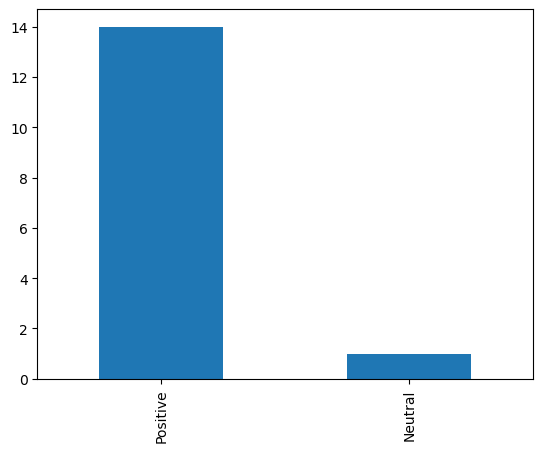

In [14]:
data1['sentiment_category'].value_counts().plot(kind='bar')

In [15]:
data2 = data.iloc[5]
data2 = pd.DataFrame(data2)
data2

,j6Fc17sSS9c
comment 1,Co parenting is not just fighting for baby's c...
comment 2,Day by day I'm realizing how hard it is to be ...
comment 3,Despite so much happening in your life you nev...
comment 4,"Sending you lots of healing, care and love cz ..."
comment 5,You are an inspiration bro ❤ you have not only...
comment 6,The most honest pregnancy vlogs ever.. Love an...
comment 7,You have no clue how much you inspire us irres...
comment 8,Also thank you for always being real. your lif...
comment 9,"Malz, my pregnancy was just like that, I would..."
comment 10,"Hey Mals, watched all your recent vlogs at a t..."


In [16]:
data2.columns = ['comments']
data2['cleaned_comments'] = data2['comments'].apply(lambda x: ''.join([i for i in x if i.isalpha() or i.isspace()]))
data2['tokens'] = data2['cleaned_comments'].apply(lambda x: x.split())

# Remove stop words
stop_words = nltk.corpus.stopwords.words('english')
data2['tokens'] = data2['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Apply sentiment analysis
sia = SentimentIntensityAnalyzer()
data2['sentiment_score'] = data2['cleaned_comments'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify the sentiments
data2['sentiment_category'] = data2['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')


<AxesSubplot:>

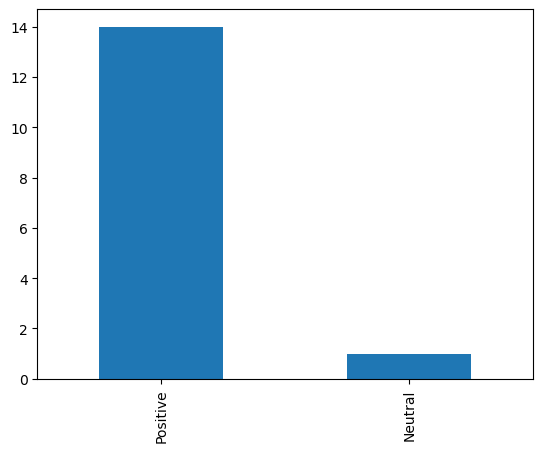

In [17]:
data2['sentiment_category'].value_counts().plot(kind='bar')

In [18]:
# !pip install vaderSentiment
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# analyzer = SentimentIntensityAnalyzer()

# # Define a function to get the sentiment score of a comment
# def get_sentiment_score(comment):
#     sentiment = analyzer.polarity_scores(comment)
#     return sentiment['compound']

# # Apply the sentiment analyzer to each comment in the dataframe
# data1['sentiment_score'] = data1['comments'].apply(get_sentiment_score)

# # Define a function to label the sentiment of a comment based on its score
# def get_sentiment_label(score):
#     if score >= 0.05:
#         return 'Positive'
#     elif score <= -0.05:
#         return 'Negative'
#     else:
#         return 'Neutral'

# # Apply the sentiment labeling function to each comment in the dataframe
# data1['sentiment_label'] = data1['sentiment_score'].apply(get_sentiment_label)

# # Print the dataframe with sentiment scores and labels
# print(data1)

## Topic Modelling

In [19]:
import gensim
from gensim import corpora, models
from gensim.models import LdaModel

dictionary = corpora.Dictionary(data1['tokens'])

# Convert tokenized documents to a matrix of bag-of-words vectors
corpus = [dictionary.doc2bow(doc) for doc in data1['tokens']]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=10)

# Print the topics and their top words
for topic in lda_model.print_topics(num_topics=10, num_words=10):
    print(topic)

(0, '0.049*"mals" + 0.026*"strong" + 0.026*"life" + 0.026*"U" + 0.026*"need" + 0.026*"smile" + 0.026*"thanks" + 0.026*"matter" + 0.026*"seeing" + 0.026*"people"')
(1, '0.028*"able" + 0.028*"partner" + 0.028*"parents" + 0.015*"uploaded" + 0.015*"good" + 0.015*"know" + 0.015*"day" + 0.015*"You" + 0.015*"mals" + 0.015*"Never"')
(2, '0.005*"parents" + 0.005*"partner" + 0.005*"able" + 0.005*"another" + 0.005*"And" + 0.005*"everyone" + 0.005*"Nothing" + 0.005*"leave" + 0.005*"remind" + 0.005*"ever"')
(3, '0.075*"I" + 0.034*"girl" + 0.017*"Love" + 0.017*"Mals" + 0.017*"love" + 0.017*"cheated" + 0.017*"time" + 0.017*"Malvika" + 0.017*"really" + 0.017*"like"')
(4, '0.005*"I" + 0.005*"girl" + 0.005*"feel" + 0.005*"cheated" + 0.005*"like" + 0.005*"Malvika" + 0.005*"time" + 0.005*"really" + 0.005*"please" + 0.005*"strength"')
(5, '0.054*"glow" + 0.054*"watching" + 0.028*"The" + 0.028*"pregnancy" + 0.028*"showing" + 0.028*"inspiration" + 0.028*"loved" + 0.028*"better" + 0.028*"You" + 0.028*"inside"

## Topic Categorization

In [20]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
ndata = pd.DataFrame({'text': newsgroups.data, 'target': newsgroups.target})
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(ndata['text'], ndata['target'], test_size=0.2, random_state=42)

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    words = text.lower().split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

vectorizer = TfidfVectorizer(preprocessor=preprocess)
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB()
clf.fit(train_vectors, train_target)

train_pred = clf.predict(train_vectors)
test_pred = clf.predict(test_vectors)

train_acc = accuracy_score(train_target, train_pred)
test_acc = accuracy_score(test_target, test_pred)

print(f'Training accuracy: {train_acc}')
print(f'Testing accuracy: {test_acc}')

Training accuracy: 0.9388431944812947
Testing accuracy: 0.8657824933687003


In [21]:
ndata.head()

,text,target
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,10
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,3
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,17
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,3
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,4


In [22]:
ndata1 = data1[['comments']]

In [23]:
test_ndata1 = vectorizer.transform(ndata1)
test_pred = clf.predict(test_ndata1)

## NER

In [24]:
import spacy

# load the pre-trained English model in spaCy
nlp = spacy.load('en_core_web_sm')

# define a function to extract named entities from a sentence
def extract_entities(text):
    doc = nlp(text)
    entities = []
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))
    return entities

# apply the extract_entities function to each row of the DataFrame
data1['entities'] = data1['cleaned_comments'].apply(extract_entities)

# print the resulting DataFrame
print(data1)


                                                     comments  \
comment 1   I just want to say and remind everyone watchin...   
comment 2   I really want to thank Malvika for uploading t...   
comment 3   I'm from Manglaore and it's so cute how your m...   
comment 4   You know it’s a good day once mals has uploaded ❤   
comment 5   I won’t mind seeing 1 hour vlogs ❤ you are so ...   
comment 6   Trust me, I was waiting for ur vlog! I always ...   
comment 7   Love from Malaysia. I’ve been watching your vi...   
comment 8   Soo proud of you!!! You are such an inspiratio...   
comment 9   Feels like my elder sister is back. When you p...   
comment 10  I love it how independent and strong you are, ...   
comment 11  you are so so strong and powerful and you radi...   
comment 12                    The pregnancy glow showing up ❤   
comment 13  U r an inspiration to smile no matter what lif...   
comment 14  We love you malzzz so so so much you're truly ...   
comment 15  Mals, so so p